In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Reading the csv file
Data = pd.read_csv('CC GENERAL.csv')

In [3]:
# First 5 rows of the dataset
Data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Missing values 
Data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Pre Processing stage
Data = Data.drop(['CUST_ID'], axis = 1)

# Replacing missing values in the column with its mean
Data['MINIMUM_PAYMENTS'] = Data['MINIMUM_PAYMENTS'].fillna(Data['MINIMUM_PAYMENTS'].mean())

# Dropping the 1 missing value
Data = Data.drop(['CREDIT_LIMIT'], axis = 1)

In [6]:
Data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
# No missing values now
Data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  PAYMEN

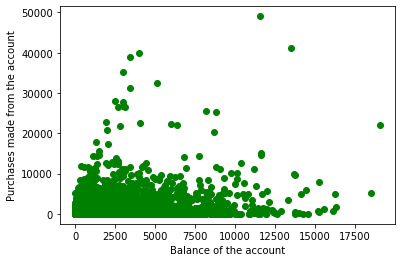

In [9]:
# Visualiztion of the balance and the purcahses
plt.scatter(Data['BALANCE'], Data['PURCHASES'], c = 'green')
plt.xlabel('Balance of the account')
plt.ylabel('Purchases made from the account')
plt.show()

In [10]:
# Importing the agglomerative clustering algorithm
from sklearn.cluster import AgglomerativeClustering  

In [11]:
Model = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [12]:
clust_labels = Model.fit_predict(Data)

In [13]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

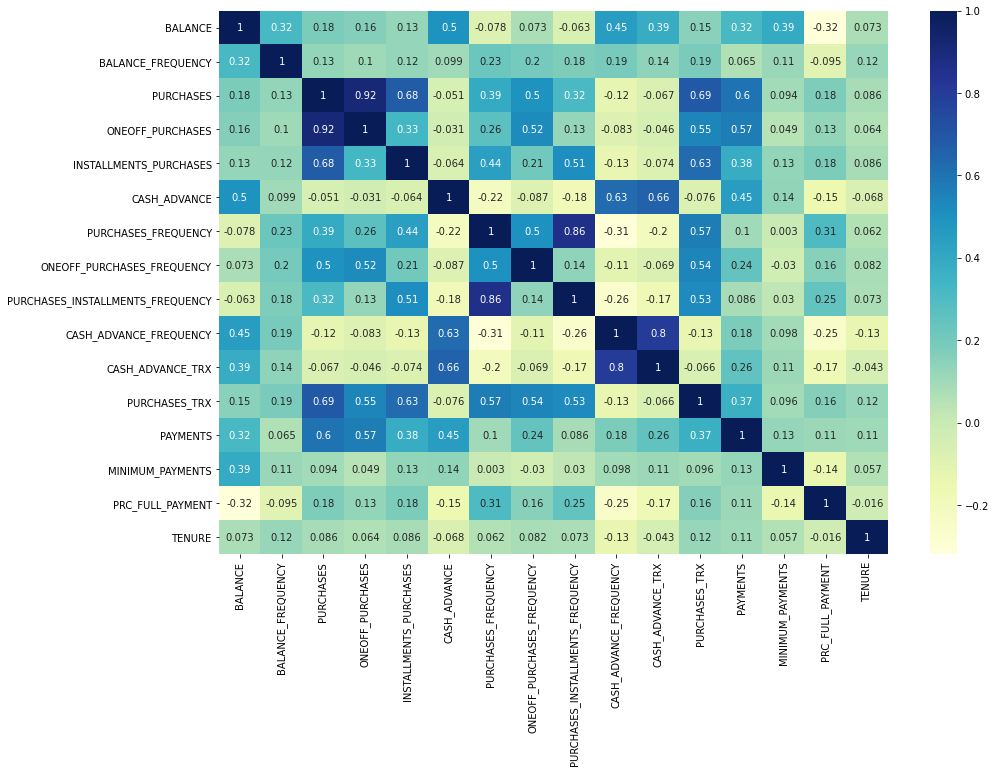

In [20]:
# Correlation heatmap
plt.figure(figsize=(15,10))
dataplot = sns.heatmap(Data.corr(), cmap="YlGnBu", annot=True)
plt.show()

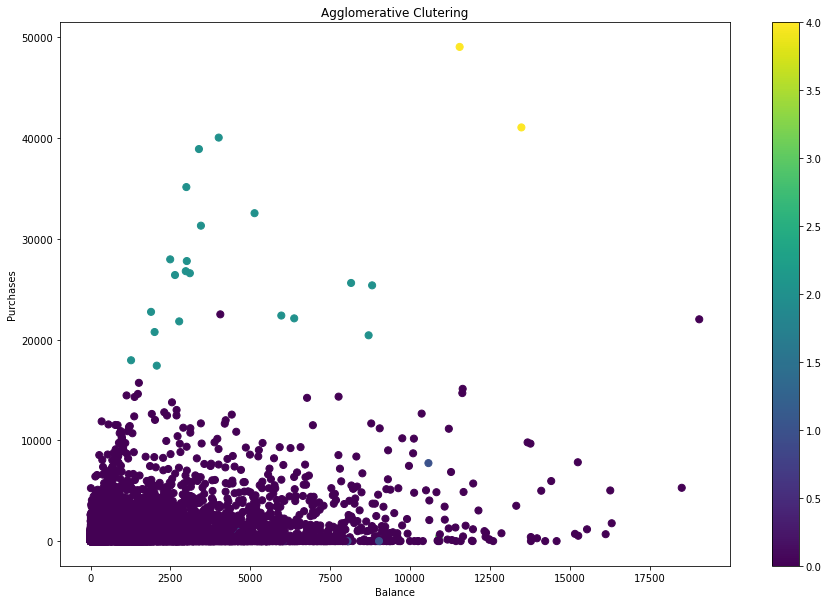

In [34]:
# Plotting the clusters

fig =plt.figure(figsize=(15,10))

ax = fig.add_subplot(111)
scatter = ax.scatter(Data['BALANCE'],Data['PURCHASES'],c= agglomerative[0], s=50)

ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Balance")
ax.set_ylabel("Purchases")
plt.colorbar(scatter)
plt.show()

In [35]:
# Importing the dendogram method
import scipy.cluster.hierarchy as shc

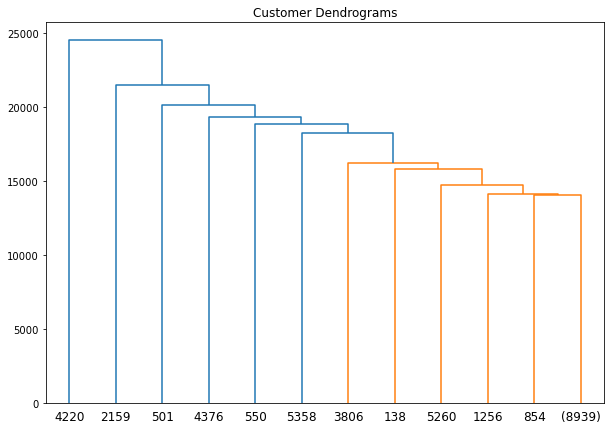

In [39]:
# PLotting the dendogram
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(Data), p =10, truncate_mode = 'level')

In [40]:
# Importing KMeans algorithm
from sklearn.cluster import KMeans

In [41]:
#Cluster our data by choosing 5 as number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)

In [42]:
kmeans.fit(Data)

KMeans(n_clusters=5, random_state=0)

In [45]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    7098
2    1363
1     427
4      38
3      24
dtype: int64

In [46]:
labels

,0
0,0
1,2
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [48]:
# Finding the best k value
Sum = []
K = range(1,5)
for k in K :
    km = KMeans(n_clusters=k)
    km = km.fit(Data)
    Sum.append(km.inertia_)

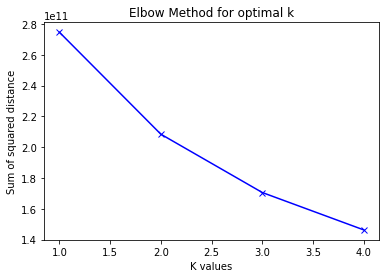

In [50]:
plt.plot(K,Sum,'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of squared distance')
plt.title('Elbow Method for optimal k')
plt.show()